# Hepatitis 

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names

File 'hepatitis.data' already there; not retrieving.

File 'hepatitis.names' already there; not retrieving.



# Data Wrangling

In [4]:
names = ['class', 'age', 'sex', 'steroid', 'antivirals',
         'fatigue', 'malaise', 'anorexia', 'liver big', 'liver firm',
         'spleen palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
         'alk phosphate', 'sgot', 'albumin', 'protime', 'histology']

In [5]:
data = pd.read_csv("hepatitis.data", sep=",", names=names)

Since the dataset does not have a patient ID we add one.

In [6]:
data["patient_id"] = range(1, len(data) + 1)

Replace the original encoding (1, 2) to (0, 1)\
Replace "?"(missing value) with NaN and convert from object type to numeric type

In [7]:
for att in data.columns:
    data[att].replace('?', np.NaN, inplace=True)
    data[att] = pd.to_numeric(data[att])

for att in ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites', 'varices', 'histology', 'class']:
    data[att].replace((1, 2), (0, 1), inplace=True)

In [8]:
data.set_index("patient_id", inplace=True)

In [9]:
data.to_csv("hepatitis_prepared.csv")

## ehrapy sanity check

In [10]:
adata = ep.io.read_csv("hepatitis_prepared.csv",
                   index_column="patient_id")

2023-01-18 19:09:16,853 - root INFO - Added all columns to `obs`.
2023-01-18 19:09:16,863 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `155` x `20`.


In [11]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 155 obs and 20 vars
╚══ 🔓 Unencoded variables
    ╠══ class -> data type: floating
    ╠══ age -> data type: floating
    ╠══ sex -> data type: floating
    ╠══ steroid -> data type: floating
    ╠══ antivirals -> data type: floating
    ╠══ fatigue -> data type: floating
    ╠══ malaise -> data type: floating
    ╠══ anorexia -> data type: floating
    ╠══ liver big -> data type: floating
    ╠══ liver firm -> data type: floating
    ╠══ spleen palpable -> data type: floating
    ╠══ spiders -> data type: floating
    ╠══ ascites -> data type: floating
    ╠══ varices -> data type: floating
    ╠══ bilirubin -> data type: floating
    ╠══ alk phosphate -> data type: floating
    ╠══ sgot -> data type: floating
    ╠══ albumin -> data type: floating
    ╠══ protime -> data type: floating
    ╚══ histology -> data type: floating

Quality control metrics missing. Calculating...

2023-01-18 19:09:16,984 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


Feature protime had more than 43.23% missing values!

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

2023-01-18 19:09:17,041 - root INFO - Column names for numeric variables ['steroid', 'antivirals', 'alk phosphate', 'sex', 'class', 'protime', 'anorexia', 'spleen palpable', 'malaise', 'fatigue', 'liver big', 'spiders', 'age', 'histology', 'liver firm', 'varices', 'bilirubin', 'ascites', 'albumin', 'sgot'] were replaced.


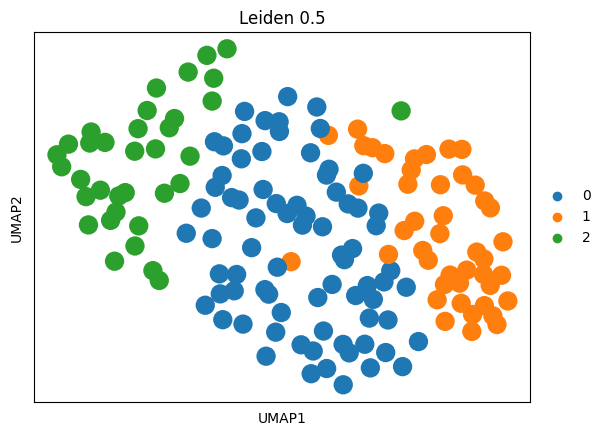

In [12]:
ep.pp.knn_impute(adata)
ep.pp.scale_norm(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

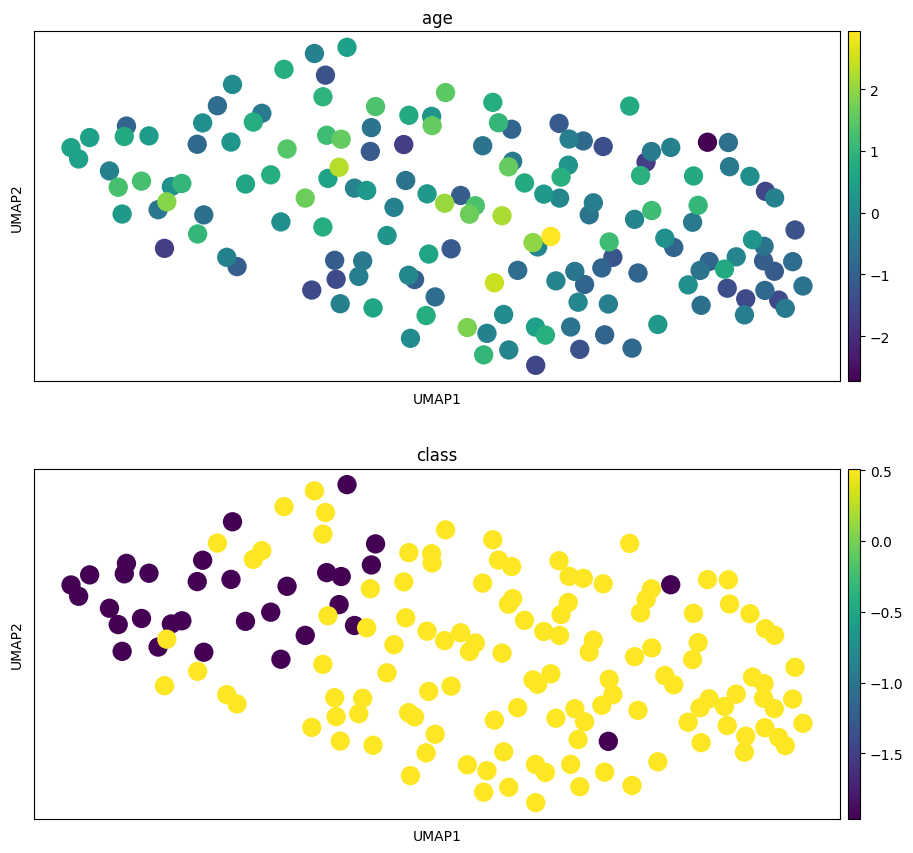

In [13]:
ep.pl.umap(adata, color=["age", "class"], ncols=1, wspace=0.75)